<a href="https://colab.research.google.com/github/daomanhcuonghust/Deep-Learning---ProtonX/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wget 
import wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=668aa03f8ec36cc396940d161a6b0d5976e311e617f5e38db2fc420846ed5101
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
wget.download('https://rukminim1.flixcart.com/image/832/832/jhgl5e80/board/2/h/j/paramount-17-x-17-green-professional-tournament-vinyl-roll-up-original-imaf5dpgxzysfhhc.jpeg')

'paramount-17-x-17-green-professional-tournament-vinyl-roll-up-original-imaf5dpgxzysfhhc.jpeg'

In [ ]:
import cv2

In [ ]:
image = cv2.imread('paramount-17-x-17-green-professional-tournament-vinyl-roll-up-original-imaf5dpgxzysfhhc.jpeg')

In [ ]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

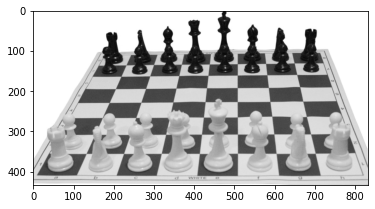

In [ ]:
plt.gray()
plt.imshow(grey_image)

In [ ]:
grey_image.shape

(433, 832)

In [ ]:
sobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelY = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

In [ ]:
def getCoord(kernel):
    center_filter = [1, 1]
    xRows = [0, 0, 1, -1, 1, -1, 1, -1]
    yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
    for k in range(8):
        pixel_in_filter_x = center_filter[0] + xRows[k]
        pixel_in_filter_y = center_filter[1] + yCols[k]
        print('(cor {}, {}) - value: {}'.format(pixel_in_filter_x, pixel_in_filter_y, kernel[pixel_in_filter_x][pixel_in_filter_y]))

In [ ]:
getCoord(sobelX)

(cor 1, 0) - value: -2
(cor 1, 2) - value: 2
(cor 2, 1) - value: 0
(cor 0, 1) - value: 0
(cor 2, 0) - value: -1
(cor 0, 0) - value: -1
(cor 2, 2) - value: 1
(cor 0, 2) - value: 1


In [ ]:
import numpy as np

def cov(grey_image, kernel):
    transformed = np.copy(grey_image)
    m = transformed.shape[0]
    n = transformed.shape[1]
    print(m, n)
    for i in range (1, m-1):
      for j in range(1, n-1): 
        center_pixel = [i, j]
        center_filter = [1, 1]
        xRows = [0, 0, 1, -1, 1, -1, 1, -1]
        yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
        new_val = 0.0

        for k in range(8):
          item = [xRows[k], yCols[k]]
          pixel_in_image_x = center_pixel[0] + item[0]
          pixel_in_image_y = center_pixel[1] + item[1]
          pixel_in_filter_x = center_filter[0] + item[0]
          pixel_in_filter_y = center_filter[1] + item[1]
          # print(pixel_in_image_x, pixel_in_image_y)
          # print(pixel_in_filter_x, pixel_in_filter_y)
          new_val = new_val + (grey_image[pixel_in_image_x, pixel_in_image_y]*kernel[pixel_in_filter_x][pixel_in_filter_y])
        new_val = new_val + grey_image[i,j]*kernel[1][1]
        if new_val < 0 :
          new_val = 0
        if new_val > 255:
          new_val = 255
        transformed[i,j] = new_val*1
    return transformed


In [ ]:
result1 = cov(grey_image,sobelX)


433 832


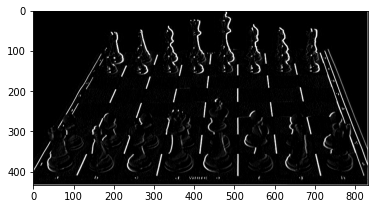

In [ ]:
plt.imshow(result1)
plt.show()

In [ ]:
result2 = cov(grey_image, sobelY)

433 832


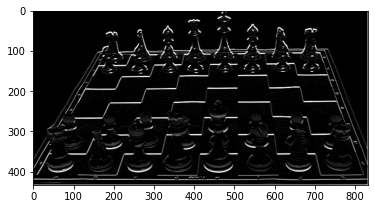

In [ ]:
plt.imshow(result2)
plt.show()

In [ ]:
def maxpool(image):
    m = len(image)
    n = len(image[0])
    new_image = np.zeros((m//2 + 1, n//2 + 1))
    xRows = [1, 1, 0]
    yCols = [0, 1, 1]

    for i in range(0, m, 2):
      for j in range(0, n, 2):
        currentpixel = [image[i][j]]
        for k in range(3):
          neighbor_x = i + xRows[k]
          neighbor_y = j + yCols[k]
          if neighbor_x < m and neighbor_y < n:
            currentpixel.append(image[neighbor_x][neighbor_y])
          new_image[i//2][j//2] = max(currentpixel)
    return new_image

In [ ]:
result3 = maxpool(result1)

In [ ]:
result3

array([[255., 255., 255., ..., 255., 255.,   0.],
       [255.,   0.,   0., ...,   0., 255.,   0.],
       [255.,   0.,   0., ...,   0., 255.,   0.],
       ...,
       [255.,   8.,   0., ...,   2., 221.,   0.],
       [254.,   8.,   2., ...,   3., 220.,   0.],
       [255., 255., 255., ..., 188., 184.,   0.]])

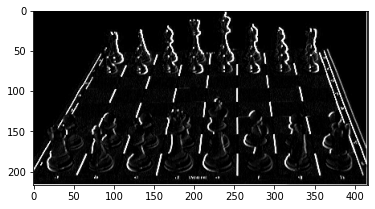

In [ ]:
plt.imshow(result3)
plt.show()

In [ ]:
result4 = maxpool(result2)

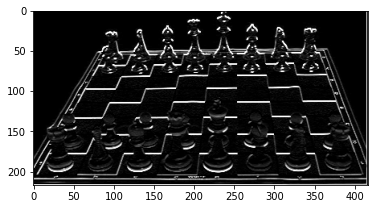

In [ ]:
plt.imshow(result4)
plt.show()